In [ ]:
# !pip install tensorflow==2.17.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy import asarray
import tensorflow as tf
from tensorflow.keras.models import load_model

In [4]:
print(tf.__version__) # Should be tensorflow version 2.17.X

2.17.0


In [14]:
food_names = sorted(os.listdir('/content/drive/MyDrive/TasteTrip/Production/v2/split_dataset/train'))

print('Number of Food Categories: {}'.format(len(food_names)))
print(food_names)

Number of Food Categories: 10
['bakso', 'batagor', 'bubur', 'gado-gado', 'mie ayam', 'nasi goreng', 'nasi padang', 'rawon', 'sate ayam', 'soto ayam']


In [19]:
MODEL_PATH = '/content/drive/MyDrive/TasteTrip/Production/v2/models'
MODEL_NAME = 'v2_efficientnetv2s_model.keras'

model = load_model(os.path.join(MODEL_PATH, MODEL_NAME))

In [9]:
def preprocess_image_as_array(path, show_output):
    im = Image.open(path).convert('RGB')
    im = im.resize((384, 384))

    image_as_array = np.expand_dims(asarray(im), axis=0)
    scaled_image_as_array = np.true_divide(image_as_array, 255)

    if show_output:
        print('Image {} completed process.'.format(path))
        plt.figure(figsize=(5, 5))
        plt.imshow(im)
        plt.axis('off')
    return scaled_image_as_array

def preprocess_and_predict(image_path, show_output=True, show_pred=False):
    image_as_array = preprocess_image_as_array(image_path, show_output)
    pred = model.predict(image_as_array)

    sorted_ranks = np.flip(np.argsort(pred[0]))

    if show_output:
        print('Food Predict:')
        highest_rank = sorted_ranks[0]
        print('Result: {:16} \nAccuracy: {:.3f}'.format(food_names[highest_rank], pred[0][highest_rank]))

    if show_pred:
      print('\nAll Prediction:')
      for i in sorted_ranks:
        print('{}: {:.3f}'.format(food_names[i], pred[0][i]))

    print('')

Image /content/soto1.webp completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Food Predict:
Result: soto ayam        
Accuracy: 0.994

All Prediction:
soto ayam: 0.994
bubur: 0.004
gado-gado: 0.001
nasi padang: 0.001
mie ayam: 0.000
bakso: 0.000
batagor: 0.000
rawon: 0.000
nasi goreng: 0.000
sate ayam: 0.000



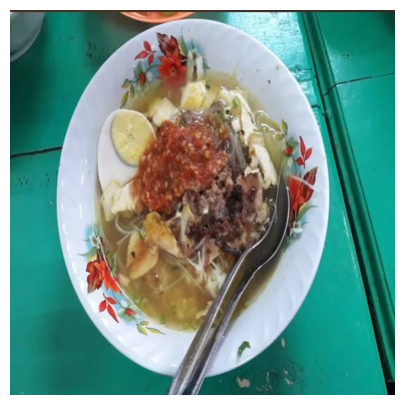

In [31]:
preprocess_and_predict('/content/soto1.webp', show_output=True, show_pred=True)

Image /content/bubur3.webp completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Food Predict:
Result: bubur            
Accuracy: 0.596

All Prediction:
bubur: 0.596
soto ayam: 0.403
mie ayam: 0.000
gado-gado: 0.000
bakso: 0.000
batagor: 0.000
rawon: 0.000
nasi goreng: 0.000
nasi padang: 0.000
sate ayam: 0.000



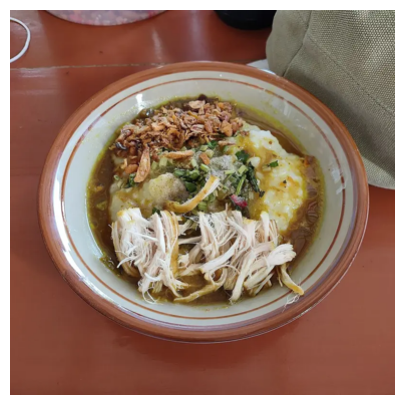

In [32]:
preprocess_and_predict('/content/bubur3.webp', show_output=True, show_pred=True)

Image /content/naspad.jpg completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Food Predict:
Result: nasi padang      
Accuracy: 1.000

All Prediction:
nasi padang: 1.000
gado-gado: 0.000
nasi goreng: 0.000
mie ayam: 0.000
rawon: 0.000
soto ayam: 0.000
batagor: 0.000
bakso: 0.000
sate ayam: 0.000
bubur: 0.000



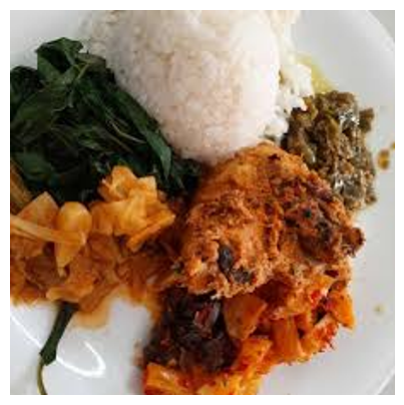

In [33]:
preprocess_and_predict('/content/naspad.jpg', show_output=True, show_pred=True)

Image /content/nasgor.jpg completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Food Predict:
Result: nasi goreng      
Accuracy: 0.620

All Prediction:
nasi goreng: 0.620
bubur: 0.184
mie ayam: 0.167
nasi padang: 0.012
batagor: 0.010
rawon: 0.004
gado-gado: 0.003
soto ayam: 0.001
sate ayam: 0.000
bakso: 0.000



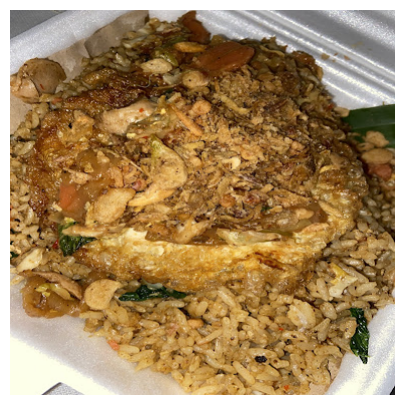

In [34]:
preprocess_and_predict('/content/nasgor.jpg', show_output=True, show_pred=True)